# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3020 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-2**<br>
**Profesora:** Paula Aguirre <br>

# Tarea 4: Algoritmos de regresión.
.

***
## Instrucciones Generales:
- Esta Tarea debe ser desarrollada completamente en lenguaje de programación Python, y estructurarse en formato de Jupyter Notebook.
- El Notebook debe estrar estructurado en forma ordenado, seguir buenas prácticas de escritura y programación, e incluir comentarios o celdas de markdown suficientes para explicar claramente todos lo códigos computacionales,

***
## Introducción.


Continuando con el caso de estudio desarrollado en las Tareas anteriores del curso, suponga que ud.está a cargo del desarrollo de un estudio del mercado laboral de científicos de datos en latinoamérica, para lo cual necesita construir, procesar y analizar una base de datos con las ofertas de trabajo publicadas en distintos países de la región.

En la **Tarea 1**, ud. avanzó en la primera etapa de construcción de la base de datos, utilizando web scraping para extraer los datos de ofertas de empleo en *data science* publicados en la red Linkedin, para una ciudad o país. Este proceso fue repetido y ampliado para todos los países de sudamérica, para construir una base de datos más amplia para su estudio.  

En la **Tarea 2**, se realizó el proceso de integración, limpieza y procesamiento de las bases de datos obtenidas mediante webscraping, generando así un conjunto de datos apto para distintos tipos de análisis.

En la **Tarea 3**, se desarrolló el análisis exploratorio  sobre una base de datos más extensa, incluyendo información de salarios ofrecidos para cada puesto de trabajo, años de experiencia y nivel de educación exigidos, y un score de ambiente laboral de cada empresa ofertante. Esta es la base de datos final a utilizar para el análisis y modelamiento de datos.

En esta **Tarea 4 y final**, ud. entrenará y validará un modelo predictivo de salarios de puestos de trabajos en Ciencia de Datos en Sudamérica.

## Datos de Entrada.

La base de datos final de ofertas de empleo para Cientistas de Datos en Sudamérica están disponibles en el siguiente link:

https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/tarea4/datosT4.csv

Esta base de datos contiene las siguientes variables:

* `Country`: país del anuncio.
* `Location`: ubicación del empleo.
* `Title`: título del cargo ofrecido.
* `Company`: nombre de la compañía.
* `Url`: URL del anuncio.
* `CountryScore`: *Índice global de innovación* del país del anuncio.
* `English`: requisito de inglés para el empleo. 1: requiere idioma inglés, 0: no requiere idioma inglés.
* `EducationLevel`: años de formación profesional requeridos para el cargo. 0: no requiere formación profesional, 1: formación técnica básica, 2: dos años de formación técnica, 3: dos años de formación técnica,     4: bachiller, 5: título profesional, 6: postgrado.
* `YearsExperience`: años de experiencia laboral requeridos.
* `CompanyScore`: calificación de ambiente laboral de la compañía.

**Nota**: estos datos han sido parcialmente simulados, no los utilice para ninguna toma de decisión real.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/tarea4/datosT4.csv')


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

### Para recordar el análisis exploratorio de datos, considere los siguientes gráficos:

<Figure size 1000x500 with 0 Axes>

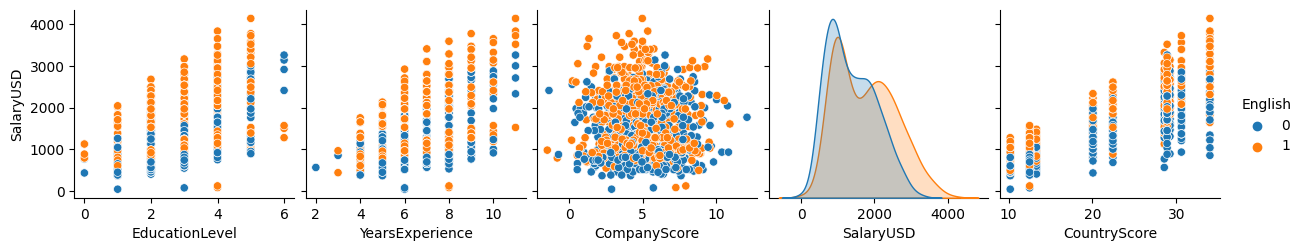

In [3]:
fig=plt.figure(figsize=(10,5));
sns.pairplot(data=df,y_vars='SalaryUSD',hue='English');

### 1. Entrenamiento y validación de modelos de regresión lineal. [6 puntos]

Considere las siguientes variables del dataset:[`English`,`EducationLevel`, `YearsExperience`,`CompanyScore`,`CountryScore`].

**a)** Utilizando la librería `sklearn`, entrene al menos 3 modelos de regresión lineal para predecir la variable `SalaryUSD`, utilizando *distintas combinaciones* de variables predictoras.<br>

Para el entrenamiento de modelos de regresión,
* Defina la matriz de variables predictoras ($X$) y el vector objetivo ($y$).
* Separe los datos en conjuntos de entrenamiento y prueba, con una proporción 70%-30%.<br>
* Recuerde estandarizar las variables predictoras.<br>


**b**) Para cada uno de los modelos entrenados, calcule las métricas de desempeño ($R^2$,RMSE) para los datasets de entrenamiento y de prueba, compare y argumente: ¿cuál combinación de variables permite obtener el mejor modelo predictivo para `SalaryUSD`?

* Note que `RMSE=np.sqrt(mean_squared_error)`


**c)** Utilice el *mejor* modelo entrenado en la parte **b)**, para realizar predicciones para nuevos datos: estime el salario en USD esperado para un puesto de trabajo con las siguientes características:

`English`=1,`EducationLevel`=6,`YearsExperience`=2,`CompanyScore`=7.5,`CountryScore`=34.0 (es decir, un cientista de datos con postgrado, 2 años de experiencia laboral, en una compñía con ranking 7.5, en Chile).

* Nota: recuerde que estos datos han sido parcialmente simulados, por lo que no reflejan necesariamente la realidad del mecardo laboral.

In [12]:
df.head(3)

,Country,Location,Title,Company,Url,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD,CountryScore
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,1,3,6,6.683722,2621,34.0
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,0,3,7,10.035329,2195,34.0
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,1,4,9,4.988700,3474,34.0


### Lo primero que podemos hacer es determinar la correlacion de las variables del enunciado con SalaryUSD (lo mismo que se hizo en la tarea anterior)

C:\Users\ccana\AppData\Local\Temp\ipykernel_16056\2731221984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = df.corr()


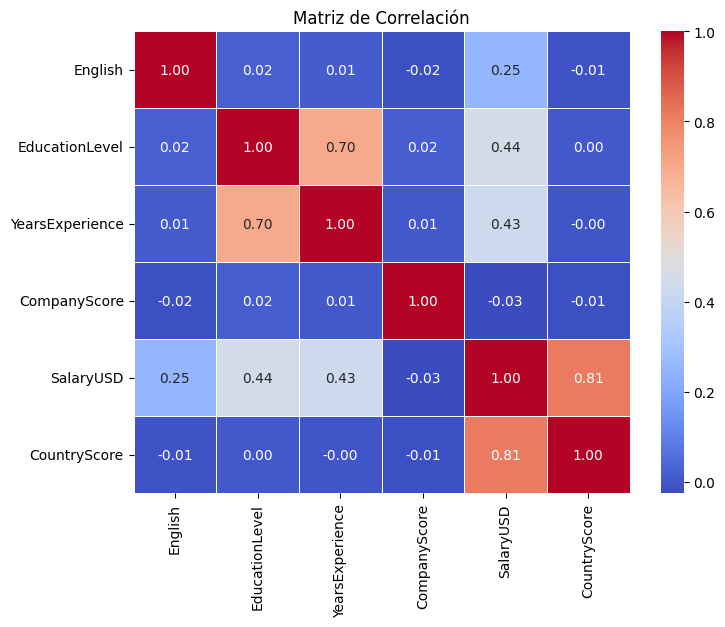

Coeficientes de correlación con SalaryUSD:
SalaryUSD          1.000000
CountryScore       0.814735
EducationLevel     0.444006
YearsExperience    0.431057
English            0.253391
CompanyScore      -0.025597
Name: SalaryUSD, dtype: float64


In [20]:
matriz = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()
correlacionSalario = matriz['SalaryUSD'].sort_values(ascending=False)
print("Coeficientes de correlación con SalaryUSD:")
print(correlacionSalario)


### modelo 1

In [101]:
X = df[['CountryScore', 'EducationLevel', 'YearsExperience']]
y = df['SalaryUSD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
modelo1 = LinearRegression()
modelo1.fit(X_train_scaled, y_train)
y_train_pred = modelo1.predict(X_train_scaled)
y_test_pred = modelo1.predict(X_test_scaled)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Modelo 1: `CountryScore`, `EducationLevel`, `YearsExperience`")
print(f"R^2 (train): {r2_train:.4f}")
print(f"RMSE (train): {rmse_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")


Modelo 1: `CountryScore`, `EducationLevel`, `YearsExperience`
R^2 (train): 0.8886
RMSE (train): 249.6087
R^2 (test): 0.8847
RMSE (test): 264.1562


### modelo 2

In [102]:
X = df[['CountryScore', 'EducationLevel', 'YearsExperience', 'English', 'CompanyScore']]
y = df['SalaryUSD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
modelo2 = LinearRegression()
modelo2.fit(X_train_scaled, y_train)
y_train_pred = modelo2.predict(X_train_scaled)
y_test_pred = modelo2.predict(X_test_scaled)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Modelo 2: Todas las Variables")
print(f"R^2 (train): {r2_train:.4f}")
print(f"RMSE (train): {rmse_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")


Modelo 2: Todas las Variables
R^2 (train): 0.9523
RMSE (train): 163.4162
R^2 (test): 0.9478
RMSE (test): 177.7441


### modelo 3

In [103]:
X = df[['CountryScore', 'EducationLevel', 'YearsExperience', 'English']]
y = df['SalaryUSD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
modelo3 = LinearRegression()
modelo3.fit(X_train_scaled, y_train)
y_train_pred = modelo3.predict(X_train_scaled)
y_test_pred = modelo3.predict(X_test_scaled)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Modelo 3: Variables con Correlación Positiva")
print(f"R^2 (train): {r2_train:.4f}")
print(f"RMSE (train): {rmse_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")


Modelo 3: Variables con Correlación Positiva
R^2 (train): 0.9522
RMSE (train): 163.6006
R^2 (test): 0.9473
RMSE (test): 178.4794


### Dataframe comparativo

In [110]:

data = {
    'Modelos': ['Modelo 1', 'Modelo 2', 'Modelo 3'],
    'Variables': ['CountryScore, EducationLevel, YearsExperience', 'All Variables', 'Variables with Positive Correlation'],
    'R2_Train': [0.8886, 0.9523, 0.9522],
    'RMSE_Train': [249.6087, 163.4162, 163.6006],
    'R2_Test': [0.8847, 0.9478, 0.9473],
    'RMSE_Test': [264.1562, 177.7441, 178.4794]
}

df_resultados = pd.DataFrame(data)
df_resultados




,Modelos,Variables,R2_Train,RMSE_Train,R2_Test,RMSE_Test
0,Modelo 1,"CountryScore, EducationLevel, YearsExperience",0.8886,249.6087,0.8847,264.1562
1,Modelo 2,All Variables,0.9523,163.4162,0.9478,177.7441
2,Modelo 3,Variables with Positive Correlation,0.9522,163.6006,0.9473,178.4794


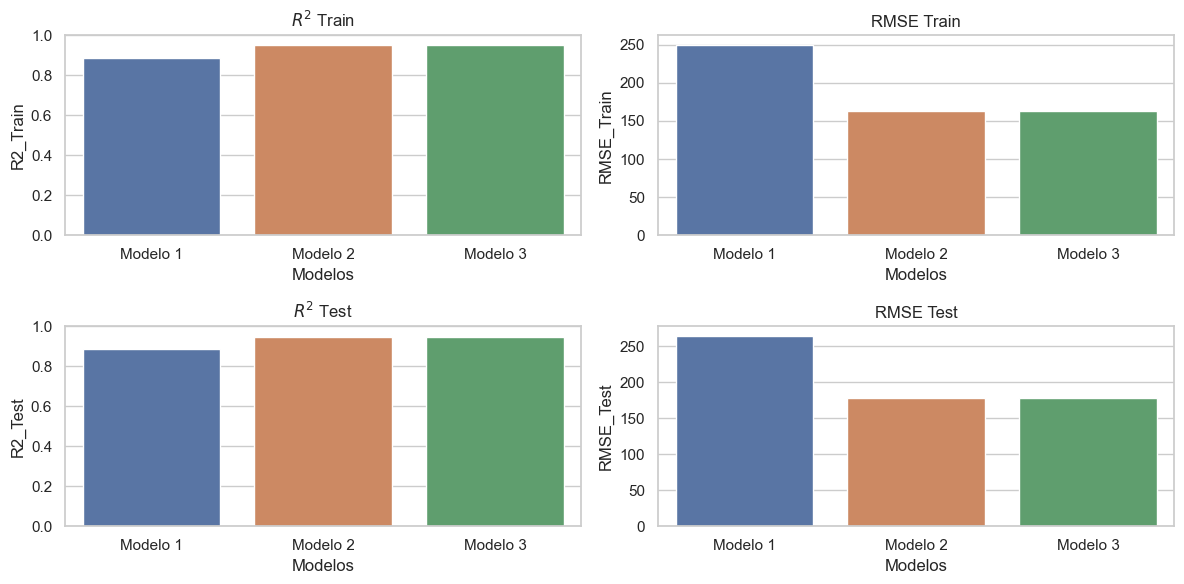

In [111]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
sns.barplot(ax=axes[0, 0], x='Modelos', y='R2_Train', data=df_resultados)
axes[0, 0].set_title('$R^2$ Train')
axes[0, 0].set_ylim(0, 1)

sns.barplot(ax=axes[0, 1], x='Modelos', y='RMSE_Train', data=df_resultados)
axes[0, 1].set_title('RMSE Train')
sns.barplot(ax=axes[1, 0], x='Modelos', y='R2_Test', data=df_resultados)
axes[1, 0].set_title('$R^2$ Test')
axes[1, 0].set_ylim(0, 1)

sns.barplot(ax=axes[1, 1], x='Modelos', y='RMSE_Test', data=df_resultados)
axes[1, 1].set_title('RMSE Test')
plt.tight_layout()
plt.show()


### Según los resultados obtenidos de cada modelo, el que presenta mejores valores de r2 y RMSE es el modelo 2.



Modelo 2: Todas las Variables
R^2 (train): 0.9523
RMSE (train): 163.4162
R^2 (test): 0.9478
RMSE (test): 177.7441


### C)

In [112]:
X_train = df[['English', 'EducationLevel', 'YearsExperience', 'CompanyScore', 'CountryScore']]
y_train = df['SalaryUSD']
modelo_mejor = make_pipeline(StandardScaler(), LinearRegression())
modelo_mejor.fit(X_train, y_train)
requisitos = np.array([[1, 6, 2, 7.5, 34.0]])
prediccion_salario = modelo_mejor.predict(requisitos)

print(f"Salario USD estimado: {prediccion_salario[0]:.2f}")


Salario USD estimado: 2598.56


C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 2. Entrenamiento y validación de modelos de regresión kNN. [6 puntos]

**a)** Utilizando la combinación idónea de variables identificada en el punto 1.b, entrene un modelo de regresión kNN con  *k=3*.<br>
**b)** Calcule las métricas de desempeño del modelo kNN ($R^2$,RMSE) para los datasets de entrenamiento y de prueba.<br>
**c)** Analice brevemente: ¿los resultados indican un posible sobreajuste (overfitting) o sub-ajuste (underfitting)? <br>
**d)** De acuerdo a su respuesta en el punto c), ¿considera que la elección *k=3* es adecuada, o sugiere un valor mayor o menor para este parámetro? Argumente brevemente su respuesta.<br>
**e)** Compare el error cuadrático medio obtenido para el modelo de regresión kNN (con *k=3*, u otro valor si prefiere), y para el mejor modelo lineal obtenido en el punto 1. Comente, ¿cuál modelo tiene el mejor desempeño, y por que? <br>

### A)

In [97]:
X = df[['English', 'EducationLevel', 'YearsExperience', 'CompanyScore', 'CountryScore']]
y = df['SalaryUSD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k = 3
modelo_knn = KNeighborsRegressor(n_neighbors=k)
modelo_knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=3)

### B)

In [82]:
y_train_pred = modelo_knn.predict(X_train_scaled)
y_test_pred = modelo_knn.predict(X_test_scaled)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Modelo kNN (k=3)")
print(f"R^2 (train): {r2_train:.4f}")
print(f"RMSE (train): {rmse_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")


Modelo kNN (k=3)
R^2 (train): 0.9816
RMSE (train): 101.3970
R^2 (test): 0.9631
RMSE (test): 149.4174


### C)

Según los resultados obtenidos, el r^2 para el train y test son altos y relativamente parecidos. Por otro lado el valor del RMSE es un poco mayor para el test.
Dicho lo anterior, pareciera que hay un leve Overfitting(mejores resultados en datos de train y peor en test ). Considerar que el overfitting al ser tan leve implica que el modelo generaliza relativamente bien


### D)

### Al haber un leve overfitting, se podria mejorar considerando otro valor para el k. Para ello podemos considerar un mejor k a partir del siguiente gráfico.

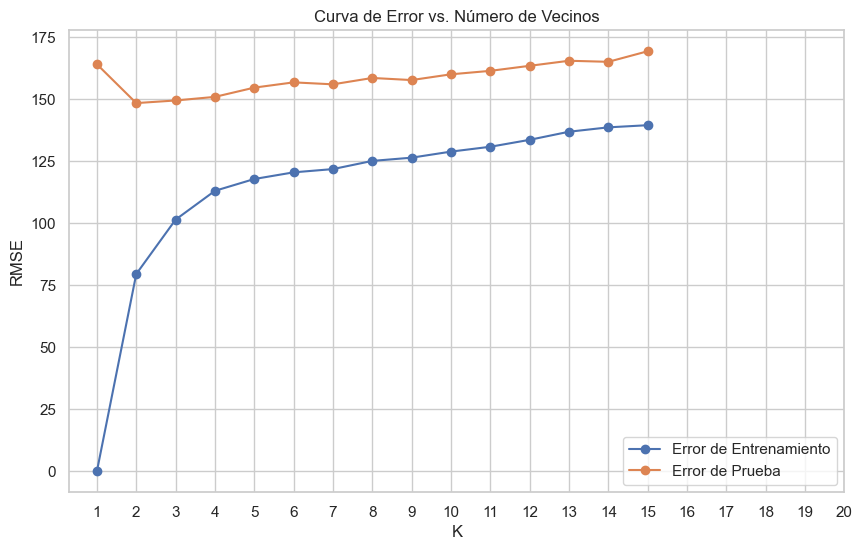

In [93]:
rango_k = range(1, 16)
train_errores = []
test_errores = []

for k in rango_k:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    train_errores.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_errores.append(np.sqrt(mean_squared_error(y_test, test_pred)))

plt.figure(figsize=(10, 6))
plt.plot(rango_k, train_errores, label='Error de Entrenamiento', marker='o')
plt.plot(rango_k, test_errores, label='Error de Prueba', marker='o')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('Curva de Error vs. Número de Vecinos')
plt.legend()
plt.grid(True)
plt.xticks(ticks=np.arange(1, 21, 1))
plt.show()


### Según lo observado en el gráfico anterior, la elección de un mejor k esta entre 6 y 7. Considerar que un aumento del k hace que el modelo sea mas robusto, esto implica un mejor desempeño para datos nuevos. Se considerará realizar nuevamente los puntos anteriores considerando un k =7

In [98]:
X = df[['English', 'EducationLevel', 'YearsExperience', 'CompanyScore', 'CountryScore']]
y = df['SalaryUSD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k = 7
modelo_knn = KNeighborsRegressor(n_neighbors=k)
modelo_knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=7)

In [99]:
y_train_pred = modelo_knn.predict(X_train_scaled)
y_test_pred = modelo_knn.predict(X_test_scaled)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Modelo kNN (k=7)")
print(f"R^2 (train): {r2_train:.4f}")
print(f"RMSE (train): {rmse_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")


Modelo kNN (k=7)
R^2 (train): 0.9735
RMSE (train): 121.7685
R^2 (test): 0.9598
RMSE (test): 155.9238


### Comparando los resultados obtenidos con k = 3 y k=7, podemos notar una reducción en el overfitting. Esto implica una mejor generalización del modelo.

### Tal como se hizo en la pregunta 1, tambien seria interesante saber la predicción para la varibale SalaryUSD en el caso k=3 y K=7

In [113]:
X = df[['English', 'EducationLevel', 'YearsExperience', 'CompanyScore', 'CountryScore']]
y = df['SalaryUSD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k = 7
modelo_knn = KNeighborsRegressor(n_neighbors=k)
modelo_knn.fit(X_train_scaled, y_train)
nuevos_datos = np.array([[1, 6, 2, 7.5, 34.0]])
nuevos_datos_scaled = scaler.transform(nuevos_datos)
salario_predicho = modelo_knn.predict(nuevos_datos_scaled)

print(f"Salario USD estimado: {salario_predicho[0]:.2f}")


Salario USD estimado: 2442.00


C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [114]:
X = df[['English', 'EducationLevel', 'YearsExperience', 'CompanyScore', 'CountryScore']]
y = df['SalaryUSD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k = 3
modelo_knn = KNeighborsRegressor(n_neighbors=k)
modelo_knn.fit(X_train_scaled, y_train)
nuevos_datos = np.array([[1, 6, 2, 7.5, 34.0]])
nuevos_datos_scaled = scaler.transform(nuevos_datos)
salario_predicho = modelo_knn.predict(nuevos_datos_scaled)

print(f"Salario USD estimado: {salario_predicho[0]:.2f}")

Salario USD estimado: 2202.67


C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### D)

In [118]:
data_comparativa = {
    'Modelo': ['Regresión Lineal', 'kNN (k=3)', 'kNN (k=7)'],
    'RMSE_Train': [163.4162, 101.3970, 121.7685],
    'RMSE_Test': [177.7441, 149.4174, 155.9238]
}

df_comparativa = pd.DataFrame(data_comparativa)
df_comparativa


,Modelo,RMSE_Train,RMSE_Test
0,Regresión Lineal,163.4162,177.7441
1,kNN (k=3),101.3970,149.4174
2,kNN (k=7),121.7685,155.9238


### En terminos de rendimiento general el modelo de knn = 3 es el mejor aunque presente un ligero overfitting, y quizás sea mejor opción elegir un modelo más robusto como el de knn con k =7. Por otro lado el modelo de regresión lineal es el peor de todos al tener un RMSE mayor que los otros 2 modelos.